In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""                           
 
# Beam.py: solves Navier-Stokes equation for flow around beam
 
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D;
from numpy import *;

print("Working, wait for the figure after 100 iterations")

Nxmax = 70;   Nymax = 20;   IL = 10;   H = 8;   T = 8;   h = 1. 
u = zeros((Nxmax+1, Nymax+1), float)                # Stream
w = zeros((Nxmax+1, Nymax+1), float)                # Vorticity
V0 = 1.0;    omega = 0.1;   nu = 1.;   iter = 0;  R = V0 * h/nu    



Working, wait for the figure after 100 iterations


10
20
30
40
50
60
70
80
90
100


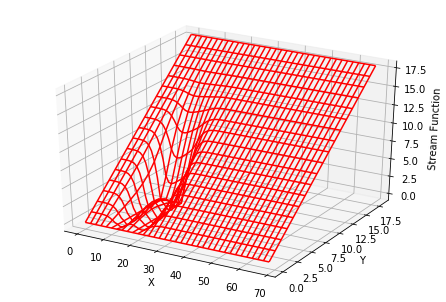

In [2]:
def borders():                                          
    for i in range(0, Nxmax+1):                 # Init stream
       for j in range(0, Nymax+1):            # Init vorticity
            w[i, j] = 0.
            u[i, j] = j * V0
    for i in range(0, Nxmax+1 ):                # Fluid surface
      u[i, Nymax] = u[i, Nymax-1] + V0*h
      w[i, Nymax-1] = 0.  
    for j in range(0, Nymax+1):
        u[1, j] = u[0, j]
        w[0, j] = 0.                             # Inlet
    for  i in range(0, Nxmax+1):                 # Centerline
       if i <=  IL and i>= IL+T:
           u[i, 0] = 0.
           w[i, 0] = 0. 
    for j in range(1, Nymax ):                    # Outlet
        w[Nxmax, j] = w[Nxmax-1, j] 
        u[Nxmax, j] = u[Nxmax-1, j]                   

def beam():                                       # BC for beam
   for  j in range (0, H+1):                      # Sides
      w[IL, j] =  - 2 * u[IL-1, j]/(h*h)          # Front
      w[IL+T, j] =  - 2 * u[IL+T+1, j]/(h*h)      # Back
   for  i in range(IL, IL+T + 1): 
   	   w[i, H - 1] =  - 2 * u[i, H]/(h*h);  
   for i in range(IL, IL+T+1):
     for j in range(0, H+1):
         u[IL, j] = 0.                          # Front
         u[IL+T, j] = 0.                        # Back
         u[i, H] = 0;                           # Top
         
def relax():                                    # Relax stream
    beam()                                      # Reset   
    for i in range(1, Nxmax):                   # Relax stream
      for  j in range (1, Nymax):
        r1 = omega*((u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1] 
        	+ h*h*w[i,j])/4-u[i,j]) 
        u[i, j] +=  r1   
    for  i in range(1, Nxmax):                # Relax vorticity
      for j in range(1, Nymax):
          a1 = w[i+1, j]  +  w[i-1,j]  +  w[i,j+1] + w[i,j-1]
          a2 = (u[i,j+1] - u[i,j-1])*(w[i+1,j] - w[i - 1, j])
          a3 = (u[i+1,j] - u[i-1,j])*(w[i,j+1] - w[i, j - 1])
          r2 = omega *( (a1 - (R/4.)*(a2 - a3) )/4. - w[i,j])
          w[i, j] +=  r2

borders()
while (iter <=  100):
    iter +=  1
    if iter%10 ==  0: print (iter)
    relax()
for i in range (0, Nxmax+1):
    for  j in range(0, Nymax+ 1):  u[i,j] = u[i,j]/V0/h      
x = range(0, Nxmax-1);        y = range(0, Nymax-1)                                                        
X, Y = p.meshgrid(x, y)                                  

def functz(u):                                  # Stream flow
    z = u[X, Y]                                      
    return z

Z = functz(u)                                           
fig = p.figure()                                                 
ax = Axes3D(fig)                                   
ax.plot_wireframe(X, Y, Z, color = 'r')          
ax.set_xlabel('X')                                              
ax.set_ylabel('Y')
ax.set_zlabel('Stream Function')
p.show()